## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
pymaceuticals_merge = pd.merge(mouse_metadata,study_results, on = "Mouse ID")

# Display the data table for preview
pymaceuticals_merge.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
pymaceuticals_unique = (pymaceuticals_merge["Mouse ID"].nunique())
pymaceuticals_unique

249

In [3]:
#Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
pymaceuticals_dup = pymaceuticals_merge[pymaceuticals_merge.duplicated(['Mouse ID', 'Timepoint'])]

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
pymaceuticals_dup

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
pymaceuticals_clean = pymaceuticals_merge.drop_duplicates(['Mouse ID', 'Timepoint'])

In [6]:
# Checking the number of mice in the clean DataFrame.
pymaceuticals_clean

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
pymaceuticals_clean = pymaceuticals_clean.rename(
    columns={"Tumor Volume (mm3)": "Tumor Volume"})
pymaceuticals_drug = pymaceuticals_clean.groupby("Drug Regimen")

#measures of central tendency and variance
mean = pymaceuticals_drug['Tumor Volume'].mean()
median = pymaceuticals_drug['Tumor Volume'].median()
var = pymaceuticals_drug ['Tumor Volume'].var()
std = pymaceuticals_drug ['Tumor Volume'].std()
sem = pymaceuticals_drug ['Tumor Volume'].sem()

#create a dataframe to put those measures in
pymaceuticals_stats = pd.DataFrame({"Mean": mean,
                                   "Median": median,
                                   "Variance": var,
                                   "Standard Deviation": std,
                                   "Standard Error": sem})
pymaceuticals_stats


# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.



,Mean,Median,Variance,Standard Deviation,Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line

pymaceuticals_tum = pymaceuticals_drug['Tumor Volume']
pymaceuticals_agg = pymaceuticals_tum.aggregate (['mean', 'median', 'var', 'std', 'sem'])
pymaceuticals_agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

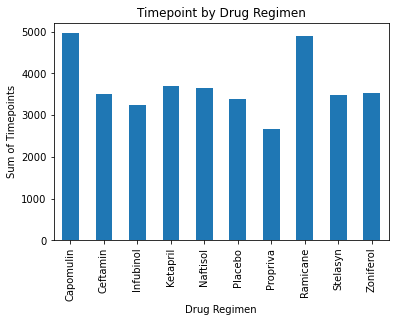

<Figure size 432x288 with 0 Axes>

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
drugregimen_group = pymaceuticals_clean.groupby('Drug Regimen')
count_timepoint = drugregimen_group['Timepoint'].sum()
timepoint_chart = count_timepoint.plot(kind = 'bar')

timepoint_chart.set_xlabel("Drug Regimen")
timepoint_chart.set_ylabel("Sum of Timepoints")

plt.title("Timepoint by Drug Regimen")

plt.show()
plt.tight_layout()

Text(0.5, 1.0, 'Timepoint by Drug Regimen')

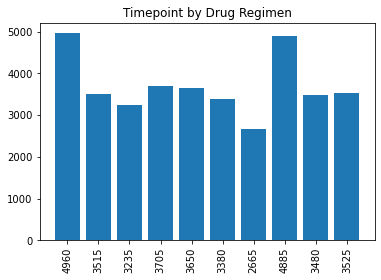

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = np.arange(len(count_timepoint))
tick_locations = [value for value in x_axis]
plt.bar(x_axis,count_timepoint)
plt.xticks(tick_locations, count_timepoint, rotation = "vertical")
plt.title("Timepoint by Drug Regimen")

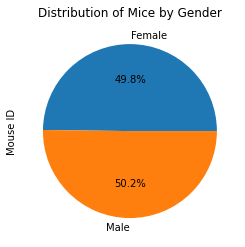

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pymaceuticals_gender = pymaceuticals_clean.groupby('Sex').nunique()['Mouse ID']
gender_pie = pymaceuticals_gender.plot(kind = "pie", title = "Distribution of Mice by Gender", autopct = "%1.1f%%")
plt.show()

([<matplotlib.patches.Wedge at 0x7fd5f094bb20>,
 [Text(0.006939175976765795, 1.0999781124353174, 'Female'),
  Text(-0.006939175976765929, -1.0999781124353174, 'Male')],
 [Text(0.0037850050782358875, 0.5999880613283548, '49.8%'),
  Text(-0.003785005078235961, -0.5999880613283548, '50.2%')])

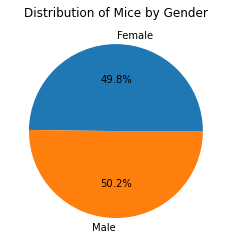

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pymaceuticals_gender = pymaceuticals_clean.groupby('Sex').nunique()['Mouse ID']
pymaceuticals_genderdf = pd.DataFrame(pymaceuticals_gender)
plt.title("Distribution of Mice by Gender")
label = pymaceuticals_genderdf.index
plt.pie(pymaceuticals_genderdf['Mouse ID'], labels = label, autopct = "%1.1f%%")
#pymaceuticals_genderdf

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
pymaceuticals_tumor = pymaceuticals_clean.groupby('Mouse ID')['Timepoint'].max()
pymaceuticals_tumordf = pd.DataFrame(pymaceuticals_tumor)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tumor_merge = pd.merge(pymaceuticals_tumordf,pymaceuticals_clean, on = ("Mouse ID", "Timepoint"))
tumor_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume,Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [14]:
# Get the tumor volume for each of the treatment regiments: Capomulin, Ramicane, Infubinol, and Ceftamin separately
# Get the tumor volume for Capomulin
capomulin = pymaceuticals_clean.loc[pymaceuticals_clean["Drug Regimen"] =="Capomulin"]
capomulin_tv = capomulin["Tumor Volume"]

#Get the tumor volume for Ramicane
ramicane = pymaceuticals_clean.loc[pymaceuticals_clean["Drug Regimen"] =="Ramicane"]
ramicane_tv = ramicane["Tumor Volume"]

#Get the tumor volume for Infubinol
infubinol = pymaceuticals_clean.loc[pymaceuticals_clean["Drug Regimen"] =="Infubinol"]
infubinol_tv = infubinol["Tumor Volume"]

#Get the tumor volume for Ceftamin
ceftamin = pymaceuticals_clean.loc[pymaceuticals_clean["Drug Regimen"] =="Capomulin"]
ceftamin_tv = ceftamin["Tumor Volume"]

In [15]:
# Put treatments into a list for for loop (and later for plot labels)
drug_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
regimen_list = []

# create the for loops 
for drugs in drug_regimens:
    regimen_df = tumor_merge.loc[tumor_merge['Drug Regimen'] == drugs]
    finalvol_df = regimen_df.loc[regimen_df['Timepoint'] == regimen_df['Timepoint']]
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = finalvol_df['Tumor Volume']
    regimen_list.append(tumor_vol)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = tumor_vol.quantile([.25, .5, .75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq - lowerq
    print(f'The lower quartile for {drugs} is: {lowerq}')
    print(f'The upper quartile for {drugs} is: {upperq}')      
    print(f'The IQR for {drugs} is: {iqr}')
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    print(f'The outliers for {drugs} would be below {lower_bound} and above {upper_bound}')
    
    outlier = (tumor_vol.loc[(finalvol_df['Tumor Volume'] <= lower_bound) | 
                              (finalvol_df['Tumor Volume'] >= upper_bound)]).count()
    print(f'There is/are {outlier} outlier(s) in {drugs}')


The lower quartile for Capomulin is: 32.37735684
The upper quartile for Capomulin is: 40.1592203
The IQR for Capomulin is: 7.781863460000004
The outliers for Capomulin would be below 20.70456164999999 and above 51.83201549
There is/are 0 outlier(s) in Capomulin
The lower quartile for Ramicane is: 31.56046955
The upper quartile for Ramicane is: 40.65900627
The IQR for Ramicane is: 9.098536719999998
The outliers for Ramicane would be below 17.912664470000003 and above 54.30681135
There is/are 0 outlier(s) in Ramicane
The lower quartile for Infubinol is: 54.04860769
The upper quartile for Infubinol is: 65.52574285
The IQR for Infubinol is: 11.477135160000003
The outliers for Infubinol would be below 36.83290494999999 and above 82.74144559000001
There is/are 1 outlier(s) in Infubinol
The lower quartile for Ceftamin is: 48.72207785
The upper quartile for Ceftamin is: 64.29983003
The IQR for Ceftamin is: 15.577752179999997
The outliers for Ceftamin would be below 25.355449580000002 and above

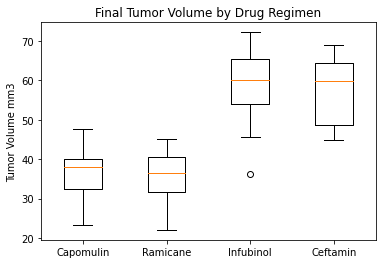

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig, ax = plt.subplots()
ax.set_title ('Final Tumor Volume by Drug Regimen')
ax.set_ylabel('Tumor Volume (mm3)')
ax.boxplot(regimen_list)
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
plt.show()

## Line and Scatter Plots

In [17]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#look at the capomulin regimen to single out one mouse id
capomulin_df = pymaceuticals_clean.loc[pymaceuticals_clean['Drug Regimen'] == 'Capomulin']
capomulin_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume,Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


Text(0.5, 1.0, 'Tumor volume over time for Capomulin Treated Mice')

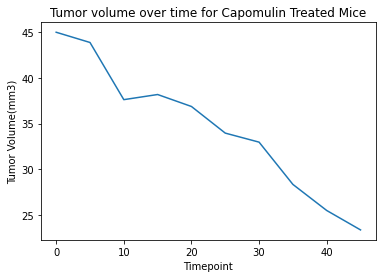

In [18]:
#use mouse id s185 to create the line plot
s185_df = pymaceuticals_clean.loc[pymaceuticals_clean['Mouse ID'] == 's185']
plt.plot(s185_df['Timepoint'], s185_df['Tumor Volume'])

#add labels
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume(mm3)')
plt.title('Tumor volume over time for Capomulin Treated Mice')

Text(0, 0.5, 'Weight (g)')

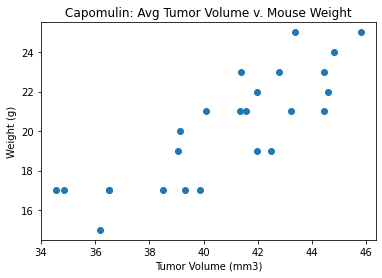

In [19]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_avg = capomulin_df.groupby('Mouse ID')['Tumor Volume'].mean()
capomulin_avg_df = pd.DataFrame(capomulin_avg)
capomulin_weight = capomulin_df.groupby('Mouse ID')['Weight (g)'].mean()
capomulin_weight_df = pd.DataFrame(capomulin_weight)

#merge the two distinct dataframes into one through mouse id
scatterplot = pd.merge(capomulin_avg_df, capomulin_weight_df, on = 'Mouse ID')

#find the x and y for the scatterplot
tvolume = scatterplot['Tumor Volume']
mweight = scatterplot['Weight (g)']

#plot the scatterplot and add in the labels
plt.scatter(tvolume, mweight)
plt.title('Capomulin: Avg Tumor Volume v. Mouse Weight')
plt.xlabel('Tumor Volume (mm3)')
plt.ylabel('Weight (g)')

## Correlation and Regression

In [20]:
# Calculate the correlation coefficient
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(tvolume, mweight)
print(f'The correlation between the mouse weight and average tumor volume for mice treated with Capomulin is {round(correlation[0],2)}')

The correlation between the mouse weight and average tumor volume for mice treated with Capomulin is 0.84


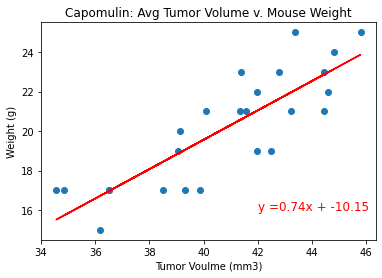

In [26]:
#develop a linear regression
correlation = st.pearsonr(tvolume, mweight)
(slope, intercept, rvalue, pvalue, stderr) = linregress(tvolume, mweight)
regression = tvolume * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(tvolume, mweight)
plt.plot(tvolume, regression, "r-")
plt.annotate(line_eq, (42,16), fontsize = 12, color = "red")

#add in the labels 
plt.xlabel('Tumor Voulme (mm3)')
plt.ylabel('Weight (g)')
plt.title('Capomulin: Avg Tumor Volume v. Mouse Weight')
plt.show()